# Customer Churn Prediction in Telecommunication: Proactive Strategies for Sustainable Growth

## Introduction

In the dynamic world of telecommunications, customer churn remains a pressing challenge for companies striving to achieve sustained success. Customers have alot of options and evolving preferences, accurately predicting churn has become important to retain and satisfy them. Customer churn is basically the loss of customers.

In this project, we use Supervised Machine Learning (classification) to explore the significance of churn analytics as a strategic tool for telecommunication companies to proactively identify potential risk factors for churn, optimize retention efforts, and cultivate lasting customer relationships. By leveraging data-driven insights and advanced analytics, companies can gain a competitive edge and ensure sustainable growth in an ever-changing industry.

## 1. Business Understanding
The churn analytics predictive model is a data-driven solution designed to address the persistent challenge of customer churn in subscription-based industries. This model aims to identify customers at risk of churn, enabling businesses to take proactive measures and implement targeted retention strategies. 

The primary objective is to reduce customer churn rates and retain valuable customers by providing insights into customer behavior, preferences, and patterns. Utilizing machine learning models such as logistic regression and decision trees, the model evaluates the data to build accurate predictions. 

Its performance is assessed through metrics like accuracy, precision, recall and F1-score. Armed with the model's insights, businesses can create personalized offers, marketing campaigns, and proactive customer support initiatives, thus improving customer satisfaction and fostering loyalty. 

### Hypothesis

**Null Hypothesis (H0)**:
"There is no significant relationship between customer tenure, monthly charges, total charges, and churn rate in the telecom company."

**Alternative Hypothesis (Ha)**:
"There is a significant relationship between customer tenure, monthly charges, total charges, and churn rate in the telecom company."

### Research Questions

1. How does customer tenure relate to churn rates? Are long-tenured customers more likely to stay with the company, and do new customers exhibit higher churn behavior?

2. Is there a correlation between the total charges and churn rates? Do customers with higher total charges exhibit different churn behavior compared to those with lower total charges

3. What is the impact of contract type on churn rates? Do customers on long-term contracts have significantly lower churn rates compared to those on short-term contracts?

4. Are there significant differences in churn behavior between customers who have device protection and those who don't?

5. What is the relationship between the availability of tech support and churn rates? Are customers with access to tech support more likely to remain with the company?

6. Do streaming services play a role in customer churn? Are customers with streaming services, such as StreamingTV and StreamingMovies, more likely to stay with the company?

7. How does the choice of payment method impact churn rates? Are customers with specific payment methods more prone to churn than others?




## 2. Data Understanding

## Installing libraries  and Packages
Here is the section to import all the packages/libraries that will be used through this notebook.

In [576]:
# %pip install pyodbc
# %pip install python-dotenv 
# %pip install openpyxl

In [577]:
# Database connections

import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

# Data handling
import pandas as pd
import openpyxl
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots

# EDA (pandas-profiling, etc. )
from statsmodels.genmod.families import Binomial
from scipy.stats import pointbiserialr

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle

## Data Loading
### Accessing first dataset from the database
The first 3000 records of the dataset can be found in a remote database.

-   **pyodbc**: A package for creating connection strings to your remote database
-   **python-dotenv**: A package for creating environment variables that will help you hide sensitve configuration informantion such as database credentials and API keys

The second dataset (2000 records) is already available as a .xlsx file. **This is the test dataset**

The third dataset is already available as a .csv file.

In [578]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER=tcp:{server};DATABASE={database};UID={username};PWD={password}"

In [579]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [580]:
# Get the cursor
cursor = connection.cursor()

# Retrieve the table names
table_names = cursor.tables(tableType='TABLE')

# Fetch all the table names
tables = table_names.fetchall()

# Print the table names
for table in tables:
    print(table.table_name)

LP2_Telco_churn_first_3000
trace_xe_action_map
trace_xe_event_map


In [581]:
# sql query to get the data

query = "SELECT * FROM LP2_Telco_churn_first_3000"
data=pd.read_sql(query,connection)

In [582]:
# preview the data

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [583]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [584]:
# Load Telco second 2000 data with openpyxl

data_xls = pd.read_excel('Telco-churn-second-2000.xlsx')
data_xls.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [585]:
# this is our test dataset to be used later

data_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [586]:
# save to csv

data_xls.to_csv ("Telco-churn-second-2000.csv", 
                  index = None,
                  header=True)

In [587]:
# load and preview last dataset

data2 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [588]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [589]:
(data.shape,data_xls.shape,data2.shape)

((3000, 21), (2000, 20), (2043, 21))

<a id='3'></a>
# 3 Descriptive Analysis

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Contains customer ID</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>whether the customer female or male</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Whether the customer is a senior citizen or not (1, 0)</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Whether the customer has a partner or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Whether the customer has dependents or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Number of months the customer has stayed with the company</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Whether the customer has a phone service or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Whether the customer has multiple lines r not (Yes, No, No phone service)</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Customer’s internet service provider (DSL, Fiber optic, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Whether the customer has online security or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Whether the customer has online backup or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Whether the customer has device protection or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Whether the customer has tech support or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Whether the customer has streaming TV or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Whether the customer has streaming movies or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>The contract term of the customer (Month-to-month, One year, Two year)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>Whether the customer has paperless billing or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card)</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>The amount charged to the customer monthly </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>The total amount charged to the customer </td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Whether the customer churned or not (Yes or No)</td>
<td>categorical</td>
</tr>
</tbody>
</table>

#### Issues with data
-  First 3000 dataset and last 2000 dataset need to be merged, however they have inconsistent Dtypes that need to be synchronized
-  We need to remove the Customer ID column as it is not necessary for our analysis
-  Missing values in First 3000 dataset need to be sorted out
-  TotalCharges Column needs to be changed to numeric Dtype

In [590]:
# Deleting Customer ID column

del data["customerID"]

In [591]:
# change seniorCitizen column form bool to int64
# (0 for False and 1 for True)

data['SeniorCitizen'] = data['SeniorCitizen'].astype('Int64')

In [592]:
# convert bool columns to object Dtypes

bool_to_obj = {'Partner': object, 
               'Dependents': object, 
               'PhoneService': object,
               'PaperlessBilling': object}

data = data.astype(bool_to_obj)

In [593]:
# Replace True and False values with Yes and No in Object columns

replace_values = {True: 'Yes', False: 'No'}

# Use replace() method
data['Partner'] = data['Partner'].replace(replace_values)
data['Dependents'] = data['Dependents'].replace(replace_values)
data['PhoneService'] = data['PhoneService'].replace(replace_values)
data['MultipleLines'] = data['MultipleLines'].replace(replace_values)
data['OnlineSecurity'] = data['OnlineSecurity'].replace(replace_values)
data['OnlineBackup'] = data['OnlineBackup'].replace(replace_values)
data['DeviceProtection'] = data['DeviceProtection'].replace(replace_values)
data['TechSupport'] = data['TechSupport'].replace(replace_values)
data['StreamingTV'] = data['StreamingTV'].replace(replace_values)
data['StreamingMovies'] = data['StreamingMovies'].replace(replace_values)
data['PaperlessBilling'] = data['PaperlessBilling'].replace(replace_values)
data['Churn'] = data['Churn'].replace(replace_values)

In [594]:
# unique values in target column (Churn)

data['Churn'].unique()

array(['No', 'Yes', None], dtype=object)

In [595]:
# check for missing values in target column

data['Churn'].isna().sum()

1

In [596]:
# Drop missing value in the Churn column

data.dropna(subset='Churn', inplace=True)

In [597]:
# view all missing values

data.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64

In [598]:
# view the missing values in TotalCharges column

data[np.isnan(data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,None,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,None,None,None,None,None,None,Two year,No,Mailed check,20.250000,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,None,None,None,None,None,None,Two year,No,Mailed check,25.750000,NaN,No
1340,Female,0,Yes,Yes,0,No,None,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No


The missing values in **TotalCharges** have a **tenure** of 0, even though there are values in the **MonthlyCharges** column. We can simply drop those rows

In [599]:
# Drop rows where tenure = 0

data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)

In [600]:
# replace the remaining missing values with the mode of their respective columns

columns_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV',
           'StreamingMovies']

for column in columns_to_replace:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [601]:
data.reset_index(drop=True, inplace=True)

In [602]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2994 non-null   object 
 1   SeniorCitizen     2994 non-null   Int64  
 2   Partner           2994 non-null   object 
 3   Dependents        2994 non-null   object 
 4   tenure            2994 non-null   int64  
 5   PhoneService      2994 non-null   object 
 6   MultipleLines     2994 non-null   object 
 7   InternetService   2994 non-null   object 
 8   OnlineSecurity    2994 non-null   object 
 9   OnlineBackup      2994 non-null   object 
 10  DeviceProtection  2994 non-null   object 
 11  TechSupport       2994 non-null   object 
 12  StreamingTV       2994 non-null   object 
 13  StreamingMovies   2994 non-null   object 
 14  Contract          2994 non-null   object 
 15  PaperlessBilling  2994 non-null   object 
 16  PaymentMethod     2994 non-null   object 


In [603]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [604]:
# Drop Customer ID column

data2.drop(columns='customerID', inplace=True)

In [605]:
# change Dtype of TotalCharges column from object to numeric

data2['TotalCharges'] = pd.to_numeric(data2['TotalCharges'], errors='coerce')

In [606]:
# merge the test datasets

Data_All= pd.concat([data, data2], ignore_index=True)
Data_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5037 non-null   object 
 1   SeniorCitizen     5037 non-null   Int64  
 2   Partner           5037 non-null   object 
 3   Dependents        5037 non-null   object 
 4   tenure            5037 non-null   int64  
 5   PhoneService      5037 non-null   object 
 6   MultipleLines     5037 non-null   object 
 7   InternetService   5037 non-null   object 
 8   OnlineSecurity    5037 non-null   object 
 9   OnlineBackup      5037 non-null   object 
 10  DeviceProtection  5037 non-null   object 
 11  TechSupport       5037 non-null   object 
 12  StreamingTV       5037 non-null   object 
 13  StreamingMovies   5037 non-null   object 
 14  Contract          5037 non-null   object 
 15  PaperlessBilling  5037 non-null   object 
 16  PaymentMethod     5037 non-null   object 


In [607]:
# view Missing Values in TotalCharges column

Data_All[np.isnan(Data_All['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3212,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
4664,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4748,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


We have some more missing values in **TotalCharges** columns. Let us delete the rows with a **tenure** of 0

In [608]:
# Drop rows where tenure = 0

Data_All.drop(labels=Data_All[Data_All['tenure'] == 0].index, axis=0, inplace=True)

In [609]:
## checking categorical values
Data_All.describe(include=['object']).T

,count,unique,top,freq
gender,5034,2,Male,2554
Partner,5034,2,No,2583
Dependents,5034,2,No,3481
PhoneService,5034,2,Yes,4547
MultipleLines,5034,3,No,2688
InternetService,5034,3,Fiber optic,2247
OnlineSecurity,5034,3,No,3155
OnlineBackup,5034,3,No,2879
DeviceProtection,5034,3,No,2867
TechSupport,5034,3,No,3119


In [610]:
## checking duplicates
print('Known observations: {}\nUnique observations: {}'.format(len(Data_All.index),len(Data_All.drop_duplicates().index)))

print("**No duplicates Found!**")


Known observations: 5034
Unique observations: 5024
**No duplicates Found!**


In [611]:
# check unique values of each column
for column in Data_All.columns:
    print('Column: {} - Unique Values: {}'.format(column, Data_All[column].unique()))

Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No' 'Yes' 'No phone service']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport - Unique Values: ['No' 'Yes' 'No internet service']
Column: StreamingTV - Unique Va

In [612]:
##missing values for numerical values
Data_All.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [613]:
Data_All.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5034.0,5034.000000,5034.000000,5034.000000
mean,0.162694,32.620580,65.107251,2300.954758
std,0.369123,24.511015,30.068019,2268.346402
min,0.0,1.000000,18.400000,18.799999
25%,0.0,9.000000,35.799999,417.662498
50%,0.0,29.000000,70.599998,1401.000000
75%,0.0,56.000000,90.050003,3860.599976
max,1.0,72.000000,118.650002,8670.100000


tenure


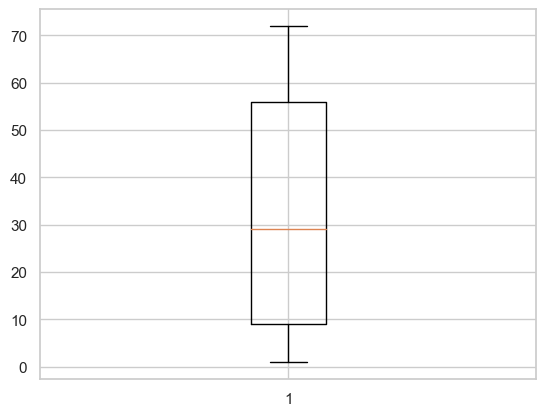

MonthlyCharges


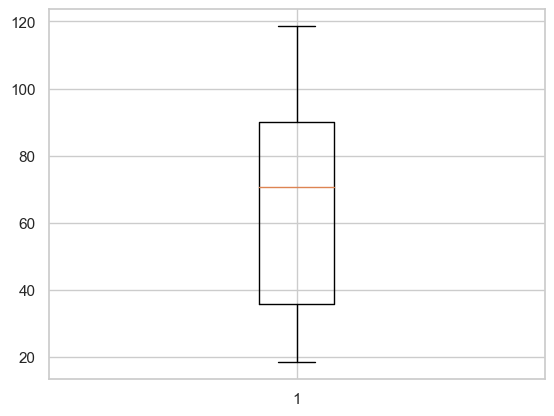

TotalCharges


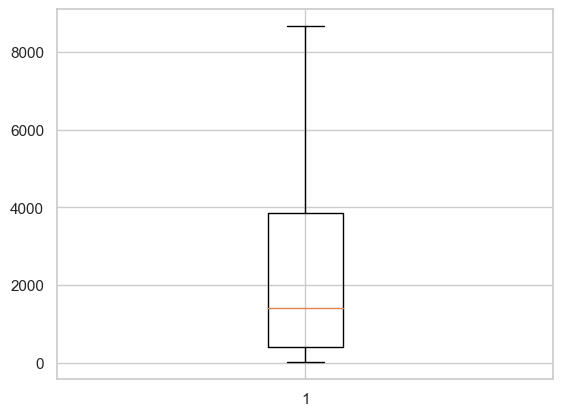

In [614]:
#Check for outliers in the numerical variables
for col in ['tenure','MonthlyCharges','TotalCharges']:
    print(col)
    plt.boxplot(Data_All[col])
    plt.show()

<a id='4.2'></a>
## Binning

There are three numerical data types which can be ranked based on their values :

* Tenure, MonthlyCharges and TotalCharges

We can bin them into three levels : **high, medium and low**

In [615]:
def binning_feature(feature):
  plt.hist(Data_All[feature])

  # set x/y labels and plot title
  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()

  bins = np.linspace(min(Data_All[feature]), max(Data_All[feature]), 4)
  print("**Value Range**")

  print(f"Low ({bins[0] : .2f} - {bins[1]: .2f})")
  print(f"Medium ({bins[1]: .2f} - {bins[2]: .2f})")
  print(f"High ({bins[2]: .2f} - {bins[3]: .2f})")
  group_names = ['Low', 'Medium', 'High']
  
  Data_All.insert(Data_All.shape[1]-1,f'{feature}-binned', pd.cut(Data_All[feature], bins, labels=group_names, include_lowest=True))
  display(Data_All[[feature, f'{feature}-binned']].head(10))


  # count values
  print("<br>**Binning Distribution**<br>")
  display(Data_All[f'{feature}-binned'].value_counts())


  # plot the distribution of each bin
  plt.bar(group_names, Data_All[f'{feature}-binned'].value_counts())
  # px.bar(data_canada, x='year', y='pop')

  # set x/y labels and plot title
  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()

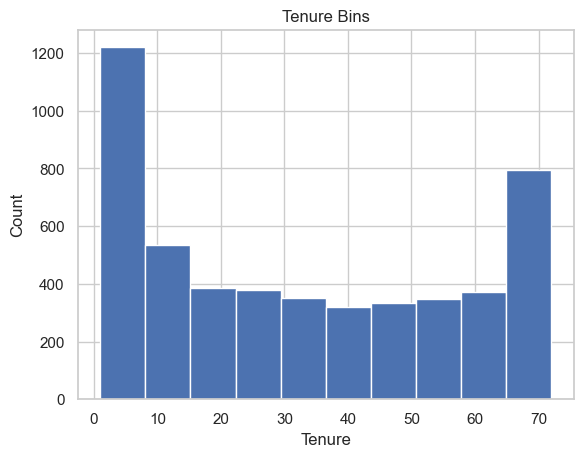

**Value Range**
Low ( 1.00 -  24.67)
Medium ( 24.67 -  48.33)
High ( 48.33 -  72.00)


,tenure,tenure-binned
0,1,Low
1,34,Medium
2,2,Low
3,45,Medium
4,2,Low
5,8,Low
6,22,Low
7,10,Low
8,28,Medium
9,62,High


<br>**Binning Distribution**<br>


tenure-binned
Low       2266
High      1606
Medium    1162
Name: count, dtype: int64

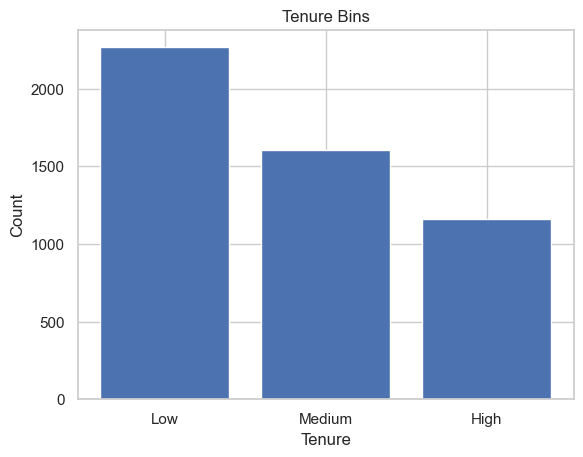

In [616]:
## Tenure
binning_feature('tenure')

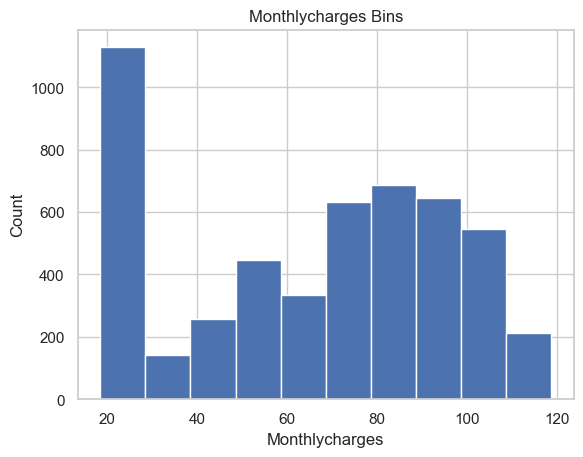

**Value Range**
Low ( 18.40 -  51.82)
Medium ( 51.82 -  85.23)
High ( 85.23 -  118.65)


,MonthlyCharges,MonthlyCharges-binned
0,29.850000,Low
1,56.950001,Medium
2,53.849998,Medium
3,42.299999,Low
4,70.699997,Medium
5,99.650002,High
6,89.099998,High
7,29.750000,Low
8,104.800003,High
9,56.150002,Medium


<br>**Binning Distribution**<br>


MonthlyCharges-binned
Low       1730
Medium    1717
High      1587
Name: count, dtype: int64

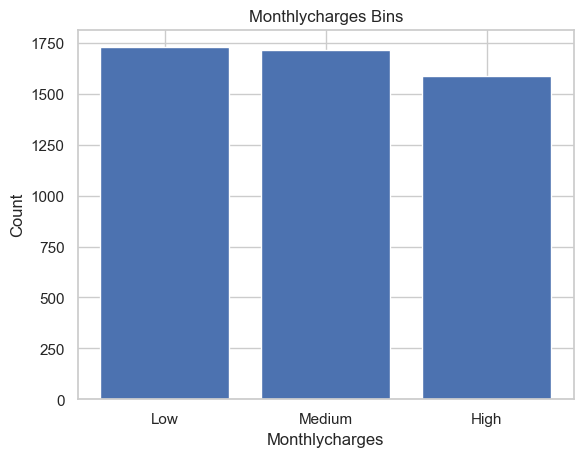

In [617]:
## monthly charges
binning_feature('MonthlyCharges')

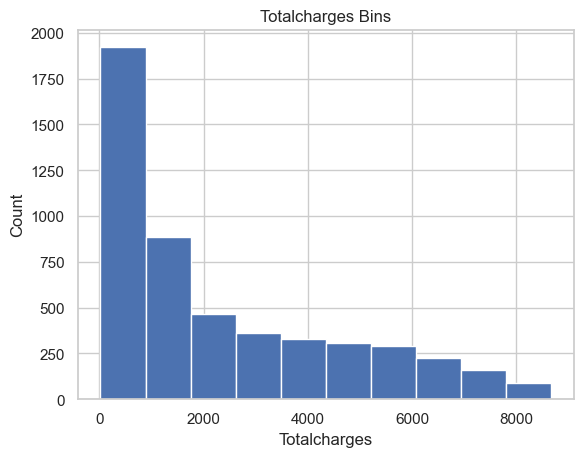

**Value Range**
Low ( 18.80 -  2902.57)
Medium ( 2902.57 -  5786.33)
High ( 5786.33 -  8670.10)


,TotalCharges,TotalCharges-binned
0,29.850000,Low
1,1889.500000,Low
2,108.150002,Low
3,1840.750000,Low
4,151.649994,Low
5,820.500000,Low
6,1949.400024,Low
7,301.899994,Low
8,3046.050049,Medium
9,3487.949951,Medium


<br>**Binning Distribution**<br>


TotalCharges-binned
Low       3403
Medium    1066
High       565
Name: count, dtype: int64

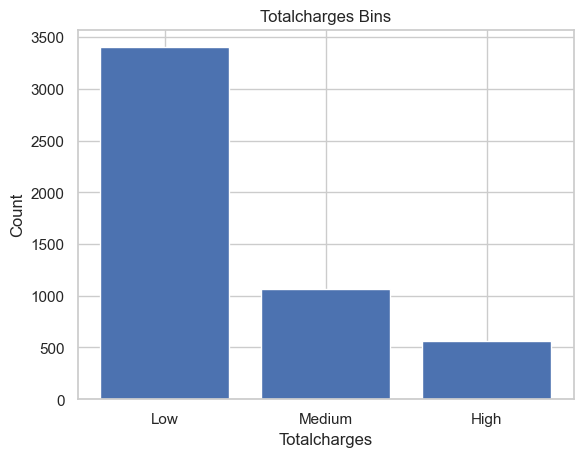

In [618]:
binning_feature('TotalCharges')

#### Saving Train data set

In [619]:
# save to csv

Data_All.to_csv('Train_Data.csv', index=False)

In [620]:
Data_All.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 0 to 5036
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 5034 non-null   object  
 1   SeniorCitizen          5034 non-null   Int64   
 2   Partner                5034 non-null   object  
 3   Dependents             5034 non-null   object  
 4   tenure                 5034 non-null   int64   
 5   PhoneService           5034 non-null   object  
 6   MultipleLines          5034 non-null   object  
 7   InternetService        5034 non-null   object  
 8   OnlineSecurity         5034 non-null   object  
 9   OnlineBackup           5034 non-null   object  
 10  DeviceProtection       5034 non-null   object  
 11  TechSupport            5034 non-null   object  
 12  StreamingTV            5034 non-null   object  
 13  StreamingMovies        5034 non-null   object  
 14  Contract               5034 non-null   object

In [621]:
## Data Types
print("**Data Types**<br>")
Data_All.dtypes.value_counts()

**Data Types**<br>


object      16
category     3
float64      2
Int64        1
int64        1
Name: count, dtype: int64

#### clean test data

In [622]:
data_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [623]:
# Drop Customer ID column

data_xls.drop(columns='customerID', inplace=True)

In [624]:
# change Dtype of TotalCharges column from object to numeric

data_xls['TotalCharges'] = pd.to_numeric(data_xls['TotalCharges'], errors='coerce')

In [625]:
# view Missing Values in TotalCharges column

data_xls[np.isnan(data_xls['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
1380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN


In [626]:
# Drop rows where tenure = 0

data_xls.drop(labels=data_xls[data_xls['tenure'] == 0].index, axis=0, inplace=True)

In [627]:
data_xls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1997 non-null   object 
 1   SeniorCitizen     1997 non-null   int64  
 2   Partner           1997 non-null   object 
 3   Dependents        1997 non-null   object 
 4   tenure            1997 non-null   int64  
 5   PhoneService      1997 non-null   object 
 6   MultipleLines     1997 non-null   object 
 7   InternetService   1997 non-null   object 
 8   OnlineSecurity    1997 non-null   object 
 9   OnlineBackup      1997 non-null   object 
 10  DeviceProtection  1997 non-null   object 
 11  TechSupport       1997 non-null   object 
 12  StreamingTV       1997 non-null   object 
 13  StreamingMovies   1997 non-null   object 
 14  Contract          1997 non-null   object 
 15  PaperlessBilling  1997 non-null   object 
 16  PaymentMethod     1997 non-null   object 
 17  

In [628]:
data_xls.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [629]:
# save to csv

data_xls.to_csv('Test_Data.csv', index=False)

## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

#### Visualizations

####  What is the Distibution of Churn Rate

In [630]:
churn_data = Data_All['Churn'].value_counts()
churn_data

Churn
No     3698
Yes    1336
Name: count, dtype: int64

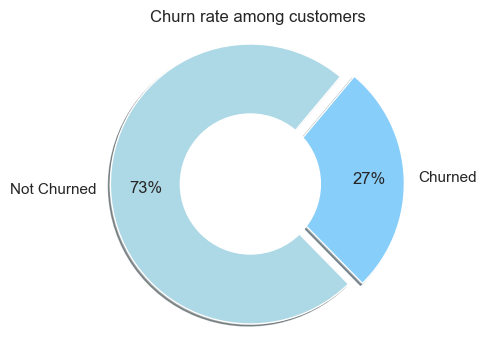

In [631]:
# Create a pie chart using Seaborn to visulaize churn rate
plt.figure(figsize=(4, 4))

plt.pie(churn_data, labels=['Not Churned','Churned'], colors=['LightBlue','LightSkyBlue'], startangle=50, shadow=True, radius=2,
     explode=(0,0.2),autopct='%1.0f%%', pctdistance=0.75 ,  )
Circle=plt.Circle((0,0), 1, color='white')
c= plt.gcf()

c.gca().add_artist(Circle)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Churn rate among customers')
plt.show()


##### 1. How does customer tenure relate to churn rates? Are long-tenured customers more likely to stay with the company, and do new customers exhibit higher churn behavior?

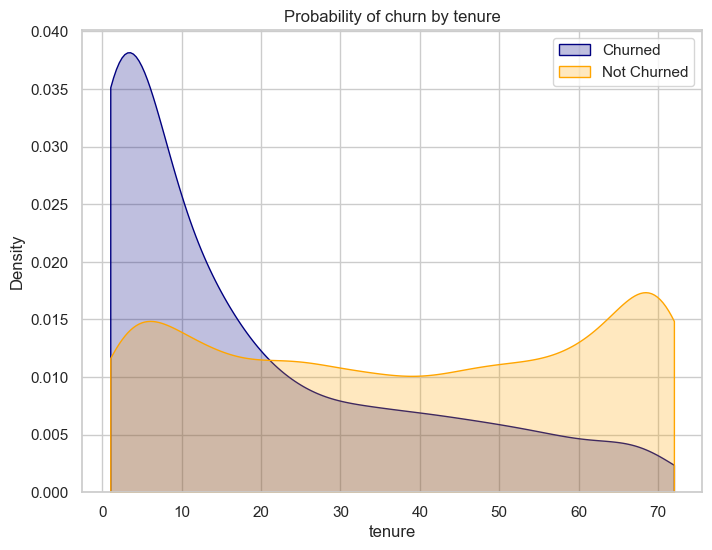

In [632]:
# We use a probability density distribution to show distribution of churn related to tenure

def kdeplot(x):
    plt.figure(figsize=(8,6))
    plt.title('Probability of churn by tenure')
    ax0= sns.kdeplot(Data_All[Data_All['Churn'] == 'Yes'][x], color='navy', label='Churn:Yes', fill =True, cut=0)
    ax1= sns.kdeplot(Data_All[Data_All['Churn'] == 'No'][x], color='orange', label='Churn:No', fill=True, cut=0)
    plt.legend(['Churned', 'Not Churned'], loc='upper right')
kdeplot('tenure')

- Customers with a lower tenure (recent customers) are more likely to churn.
- Customers on a longer tenure are less likely to churn.

##### 2. Is there a correlation between the total charges and churn rates? Do customers with higher total charges exhibit different churn behavior compared to those with lower total charges

Correlation coefficient: -0.19462794572064998
P-value: 3.6678433707849766e-44


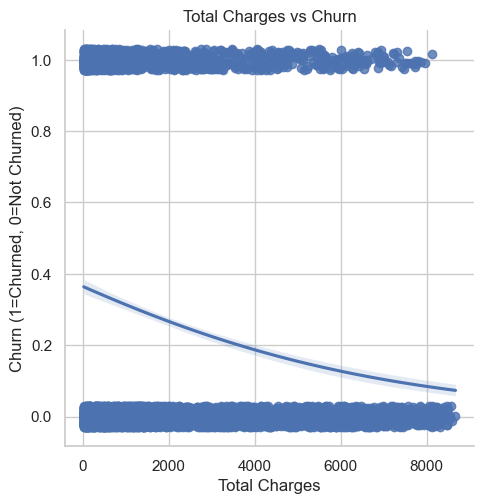

In [633]:
# Create a DataFrame from the dataset
df = pd.DataFrame(Data_All)

# Convert "TotalCharges" column to numeric type and then to integers
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce", downcast="integer")

# Convert "Churn" column to integers (1 for 'Yes' and 0 for 'No')
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Calculate the point-biserial correlation between TotalCharges and Churn
corr, p_value = pointbiserialr(df["TotalCharges"], df["Churn"])

# Print the correlation coefficient and p-value
print("Correlation coefficient:", corr)
print("P-value:", p_value)

# Plot the data points and visualize the relationship between TotalCharges and Churn

sns.set(style="whitegrid")
sns.lmplot(df, x="TotalCharges", y="Churn",
           logistic=True, y_jitter=.03)

plt.xlabel("Total Charges")
plt.ylabel("Churn (1=Churned, 0=Not Churned)")
plt.title("Total Charges vs Churn")
plt.show()

The analysis shows a weak negative correlation between total charges and churn rates. As total charges increase, the likelihood of churn slightly decreases. The relationship is statistically significant (P-value < 0.05), but the effect is not very strong. Other factors may have a more significant impact on churn behavior.

##### 3. What is the impact of contract type on churn rates? Do customers on long-term contracts have significantly lower churn rates compared to those on short-term contracts?



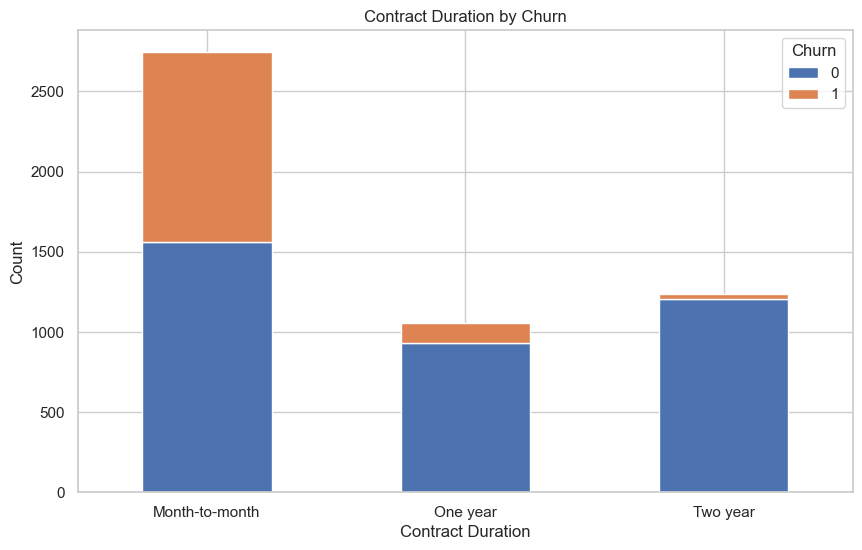

In [634]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(df['Contract'], df['Churn'])

# Plot the stacked bar plot using Seaborn

ax = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Contract Duration by Churn")
plt.xlabel("Contract Duration")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right")
plt.show()


- Customers with short term (month-to-month) contracts have higher churn rates than customers with long term (one year+ contracts) 
- Possible reasons could include price sensitivity, competition, ineffective onboarding, and changing needs. To reduce short-term churn, focus on personalized experiences, competitive pricing, and improving onboarding processes. Building strong customer relationships and demonstrating long-term value can encourage customer loyalty.

##### 4. Are there significant differences in churn behavior between customers who have device protection and those who don't?

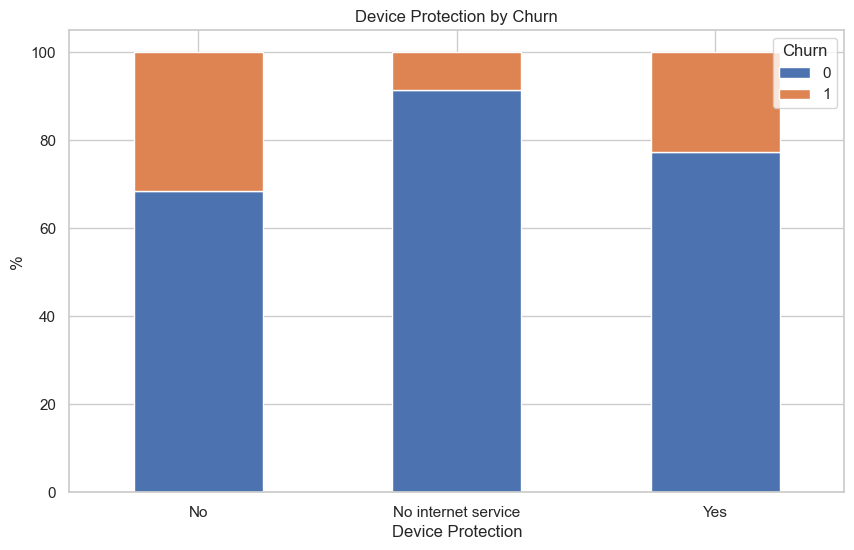

In [635]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(df['DeviceProtection'], df['Churn'])

# Plot the stacked bar plot using Seaborn
percentages = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Plot the stacked bar plot using Seaborn
sns.set(style="whitegrid")
ax = percentages.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Device Protection by Churn")
plt.xlabel("Device Protection")
plt.xticks(rotation=0)
plt.ylabel("%")
plt.legend(title="Churn", loc="upper right")


plt.show()

- Customers without device protection are slightly more likelt to churn, although not significantly enough

##### 5. What is the relationship between the availability of tech support and churn rates? Are customers with access to tech support more likely to remain with the company?

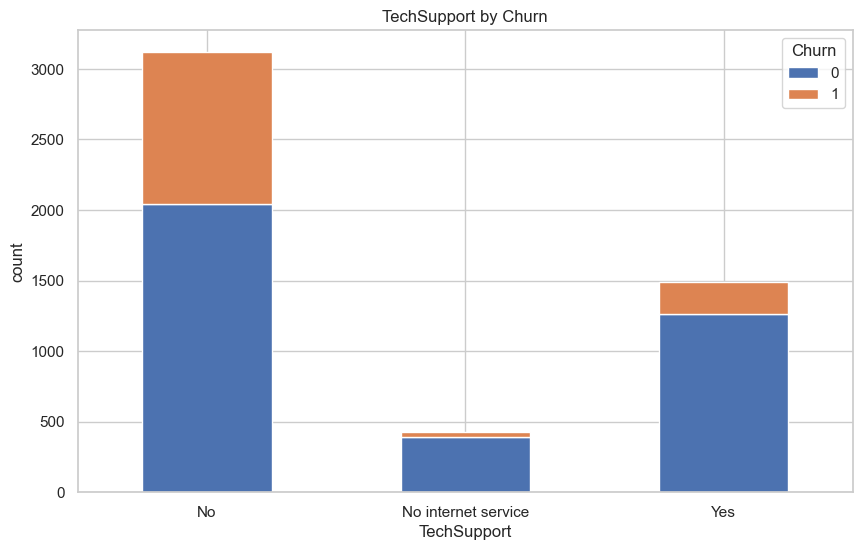

In [636]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(df['TechSupport'], df['Churn'])

# Plot the stacked bar plot using Seaborn
sns.set(style="whitegrid")
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("TechSupport by Churn")
plt.xlabel("TechSupport")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.legend(title="Churn", loc="upper right")


plt.show()

- Customers with no tech support were more likely to churn

6. Do streaming services play a role in customer churn? Are customers with streaming services, such as StreamingTV and StreamingMovies, more likely to stay with the company?

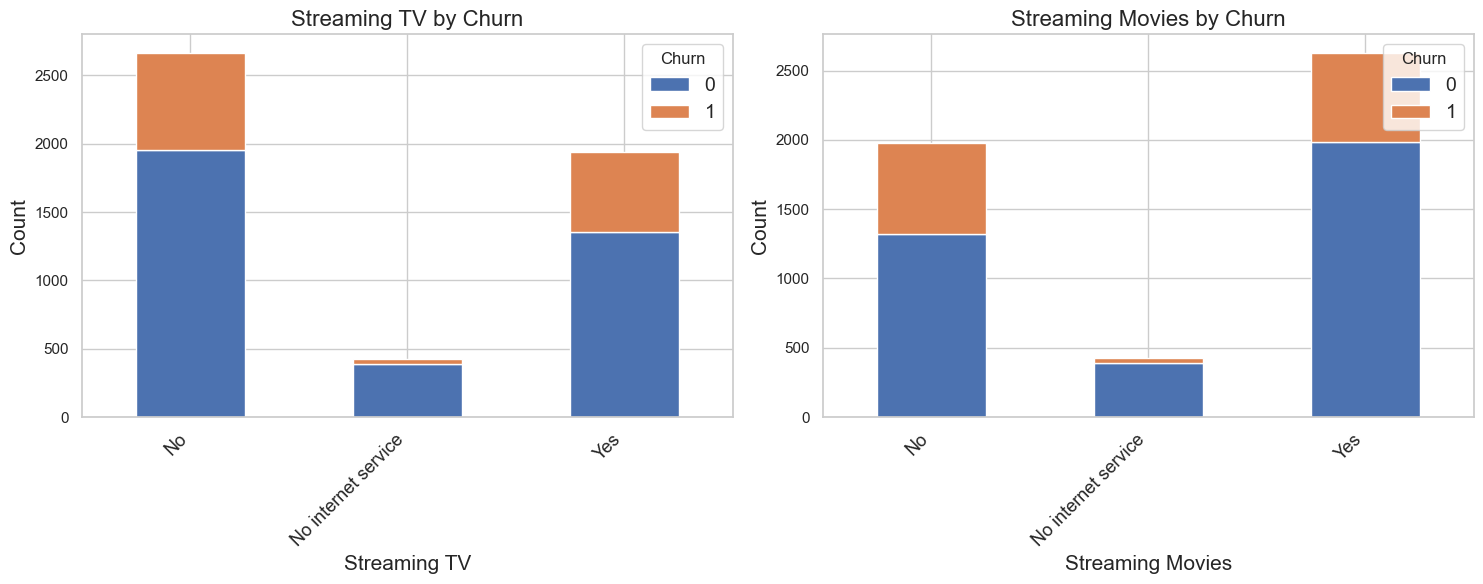

In [637]:
# Create a cross-tabulation (crosstab) of the two categorical columns and 'Churn' column
cross_tab1 = pd.crosstab(df['StreamingTV'], df['Churn'])
cross_tab2 = pd.crosstab(df['StreamingMovies'], df['Churn'])

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first stacked bar chart
cross_tab1.plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_title("Streaming TV by Churn", fontsize=16)
axes[0].set_xlabel("Streaming TV", fontsize=15)
axes[0].set_ylabel("Count", fontsize=15)
axes[0].legend(title="Churn", loc="upper right", fontsize=14)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=13)
# Plot the second stacked bar chart
cross_tab2.plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_title("Streaming Movies by Churn", fontsize=16)
axes[1].set_xlabel("Streaming Movies",fontsize=15)
axes[1].set_ylabel("Count", fontsize=15)
axes[1].legend(title="Churn", loc="upper right", fontsize=14)

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right', fontsize=13)
# Adjust layout and display
plt.tight_layout()
plt.show()

7. How does the choice of payment method impact churn rates? Are customers with specific payment methods more prone to churn than others?

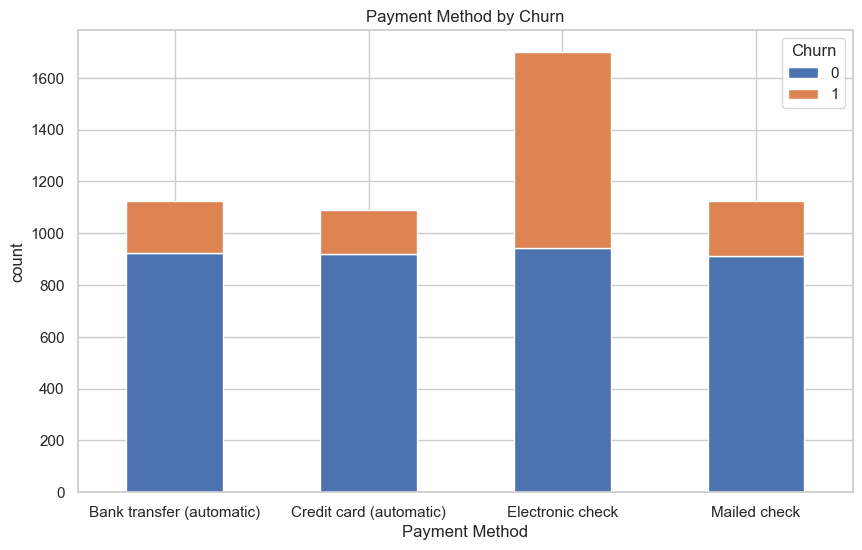

In [638]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(df['PaymentMethod'], df['Churn'])

# Plot the stacked bar plot using Seaborn
sns.set(style="whitegrid")
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Payment Method by Churn")
plt.xlabel("Payment Method")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.legend(title="Churn", loc="upper right")


plt.show()

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

In [639]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,Low,Low,Low,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,Medium,Medium,Low,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Low,Medium,Low,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,Medium,Low,Low,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Low,Medium,Low,1


In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 0 to 5036
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 5034 non-null   object  
 1   SeniorCitizen          5034 non-null   Int64   
 2   Partner                5034 non-null   object  
 3   Dependents             5034 non-null   object  
 4   tenure                 5034 non-null   int64   
 5   PhoneService           5034 non-null   object  
 6   MultipleLines          5034 non-null   object  
 7   InternetService        5034 non-null   object  
 8   OnlineSecurity         5034 non-null   object  
 9   OnlineBackup           5034 non-null   object  
 10  DeviceProtection       5034 non-null   object  
 11  TechSupport            5034 non-null   object  
 12  StreamingTV            5034 non-null   object  
 13  StreamingMovies        5034 non-null   object  
 14  Contract               5034 non-null   object

In [641]:
df['tenure-binned'].value_counts()

tenure-binned
Low       2266
High      1606
Medium    1162
Name: count, dtype: int64

<Axes: xlabel='tenure-binned', ylabel='count'>

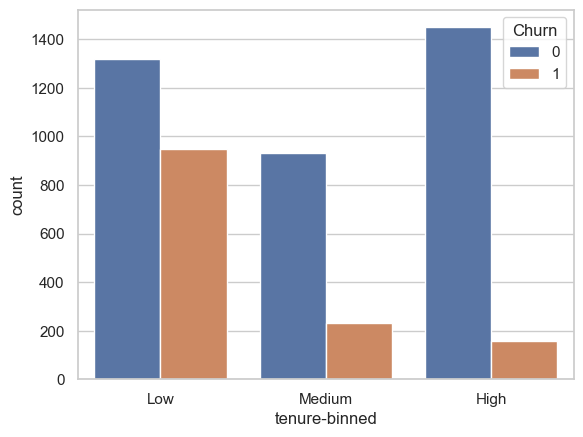

In [642]:
sns.countplot(x='tenure-binned', hue='Churn', data=df)

<Axes: xlabel='MonthlyCharges-binned', ylabel='count'>

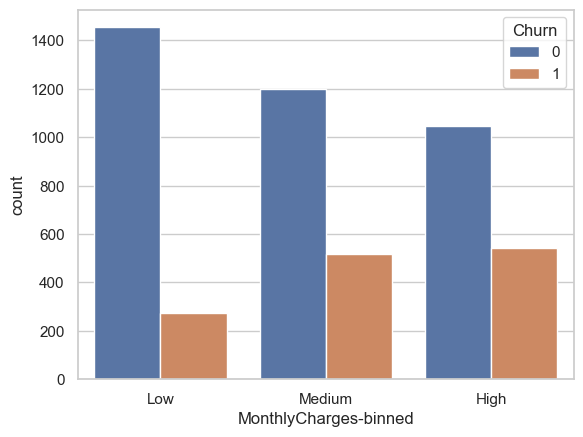

In [643]:
sns.countplot(x='MonthlyCharges-binned', hue='Churn', data=df)

<Axes: xlabel='TotalCharges-binned', ylabel='count'>

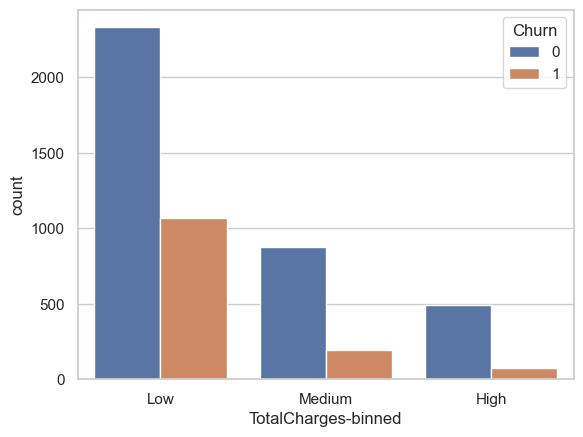

In [644]:
sns.countplot(x='TotalCharges-binned', hue='Churn', data=df)

In [645]:
df.drop(columns=['MonthlyCharges', 'TotalCharges', 'tenure'], inplace=True)

In [646]:
pd.set_option('display.max_columns', None)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
0,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,Low,Low,Low,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,Medium,Medium,Low,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Low,Medium,Low,1
3,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),Medium,Low,Low,0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Low,Medium,Low,1


## Features Encoding

In [647]:
# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df[column] = df[column].map({'Female': 1, 'Male': 0})
    else: 
        df[column] = df[column].map({'Yes': 1, 'No': 0})

In [648]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
0,1,0,1,0,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,Low,Low,Low,0
1,0,0,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,Medium,Medium,Low,0
2,0,0,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,Low,Medium,Low,1
3,0,0,0,0,0,No,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),Medium,Low,Low,0
4,1,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,Low,Medium,Low,1


In [651]:
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=one_hot_encoding_columns, drop_first=True)

## Features Scaling

In [ ]:
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df[column].min()
        # maximum value of the column
        max_column = df[column].max()
        # min max scaler
        df[column] = (df[column] - min_column) / (max_column - min_column)

KeyError: 'tenure'

## Dataset Splitting

In [ ]:

X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Optional: Train set Balancing (for Classification only)

In [ ]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [ ]:
# Code here

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [ ]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app